<img src='../../../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>
<br>

# European Environment Agency (EEA) Air Quality Data

### About

The European Environment Agency (EEA) has a network of air quality monitoring stations across Europe. These stations record data for a number of pollutants, e.g. Particulate Matter 2.5 and Particulate Matter 10, and are placed in different environments to capture what is happening across both urban and rural areas. To learn more about the stations and look up station codes, explore the [European Air Quality Index map](https://www.eea.europa.eu/themes/air/air-quality-index/index).

In the air quality directive (2008/EC/50), the EU has set two limit values for particulate matter (PM10) for the protection of human health: the PM10 daily mean value may not exceed 50 micrograms per cubic metre (µg/m3) more than 35 times in a year and the PM10 annual mean value may not exceed 40 micrograms per cubic metre (µg/m3). [(Source)](https://www.eea.europa.eu/data-and-maps/figures/particulate-matter-pm10-annual-limit-value-for-the-protection-of-human-health-3)

As for PM2.5, no daily limit has been set by the EU, but the World Health Organisation's daily limit is 25 micrograms per cubic metre (µg/m3). Read more [here](https://www.eea.europa.eu/themes/air/air-quality-concentrations/air-quality-standards).

### Basic Facts

> **Spatial coverage**: `Observation stations across Europe` <br>
> **Temporal resolution**:  `daily aggregates` <br>
> **Data format**: `csv`


### How to access the data

The EEA air quality data is available for download via the [EEA Air Quality Portal](https://discomap.eea.europa.eu/map/fme/AirQualityExport.htm).
The Python library `airbase` allows you to download all EEA Air Quality data for a country at once. You can specify which pollutant, country and time period you want to download. Read more about the library [here](https://airbase.readthedocs.io/en/latest/).

The first part of this notebook ([1 - Download EEA Air Quality data for specific pollutants and countries](#download_eea)) shows you how to request EEA Air Quality data with the library `airbase`.


### Module outline
* [*Optional: Download EEA Air Quality data for specific pollutants and countries*](#download_eea)
* [1 - Read the observation data with pandas](#read_eea)
* [2 - Visualize daily EEA PM10 and EEA PM2.5 at Varese, Italy for February 2021](#visualize_eea)

<hr>

#### Load libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import airbase

<hr>

### <a id='download_eea'></a>*Optional: Download EEA Air Quality data for specific pollutants and countries*

The Python library `airbase` allows you to download all EEA Air Quality data for a country at once. You can specify which pollutant, country and time period you want to download. Read more about the library [here](https://airbase.readthedocs.io/en/latest/). Due to the large file sizes, it is recommended to download data for each country and pollutant (PM10 and PM2.5) separately. We have predownloaded data for Italy for you.

The first step is to store the `airbase` client in a variable called `client`.

In [2]:
client = airbase.AirbaseClient()

<br>

Next, we define a download request by stating which country, pollutant and year we want the data from. The abbreviation for Italy is `"IT"` and the pollutant is `"PM10"`. We only want data from `2021`, so we specify both, the `year_from` and `year_to` as `2021`. 

By using the function `download_to_file()`, all the 490 resulting CSVs are concatenated into a single CSV file called `IT_PM10_2021.csv`. Each CSV contains data from a single station. It is recommended to download all the data for a country into one CSV to make it easier to search for a station using the station code. You are able to change the file name to anything you wish. We also specify where the data should be stored by stating the file path `"../data/2_observations/eea/IT_PM10_2020.csv"`. 

We have commented out the code as these data have already been downloaded for you.

In [ ]:
#r = client.request(country=["IT"], pl=["PM10"], year_from=2021, year_to=2021)
#r.download_to_file("../../../eodata/50_modules/01_dust/02_observations/eea/IT_PM10_2021.csv")

Next, we download the PM2.5 data for Italy and store it in a CSV called `IT_PM2pt5_2021.csv`. You will notice that there are fewer stations that collect PM2.5 data, just 226.

In [ ]:
#r = client.request(country=["IT"], pl=["PM2.5"], year_from=2021, year_to=2021)
#r.download_to_file("../../../eodata/50_modules/01_dust/02_observations/eea/IT_PM2pt5_2021.csv")

<br>

### <a id='read_eea'></a>1. Read the observation data with pandas

For this exercise, we will focus on the Varese station in Italy, which is close to Ispra.

The EEA air quality station in Varese, Italy has the code `IT1588A`. Let us start by looking at PM10. The file has the name `IT_PM10_2021.csv`. You can read `csv` files with the function `read_table()` from the Python library `pandas`. We can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index
* `low_memory`: this is set to `False` in this case to avoid mixed type interference

Because the data is stored in a comma-separated values file, the delimiter is set to `,`. The first row of the file contains the header information, thus we set the header value to `[0]`. Finally, we set the index column to be the 5th column in the file, which is the `AirQualityStationEoICode`.

You see below that the resulting dataframe has 495859 rows and 16 columns.

In [2]:
df = pd.read_table('../../../eodata/50_modules/01_dust/02_observations/eea/IT_PM10_2021.csv', delimiter=',', header=[0], index_col=4, low_memory=False)
df

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
AirQualityStationEoICode,,,,,,,,,,,,,,,,
IT1519A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1519A,SPO.IT1519A_5_gravi_2002-01-01_00:00:00,SPP.IT1519A_5_gravi_2002-01-01_00:00:00,SAM.IT1519A_5_gravi_2002-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,17.0,µg/m3,2021-04-26 00:00:00 +01:00,2021-04-27 00:00:00 +01:00,1,2
IT1519A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1519A,SPO.IT1519A_5_gravi_2002-01-01_00:00:00,SPP.IT1519A_5_gravi_2002-01-01_00:00:00,SAM.IT1519A_5_gravi_2002-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,16.0,µg/m3,2021-04-27 00:00:00 +01:00,2021-04-28 00:00:00 +01:00,1,2
IT1519A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1519A,SPO.IT1519A_5_gravi_2002-01-01_00:00:00,SPP.IT1519A_5_gravi_2002-01-01_00:00:00,SAM.IT1519A_5_gravi_2002-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,20.0,µg/m3,2021-04-28 00:00:00 +01:00,2021-04-29 00:00:00 +01:00,1,2
IT1519A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1519A,SPO.IT1519A_5_gravi_2002-01-01_00:00:00,SPP.IT1519A_5_gravi_2002-01-01_00:00:00,SAM.IT1519A_5_gravi_2002-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,12.0,µg/m3,2021-04-29 00:00:00 +01:00,2021-04-30 00:00:00 +01:00,1,2
IT1519A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1519A,SPO.IT1519A_5_gravi_2002-01-01_00:00:00,SPP.IT1519A_5_gravi_2002-01-01_00:00:00,SAM.IT1519A_5_gravi_2002-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,10.0,µg/m3,2021-04-30 00:00:00 +01:00,2021-05-01 00:00:00 +01:00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT1524A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1524A,SPO.IT1524A_5_gravi_2004-01-01_00:00:00,SPP.IT1524A_5_gravi_2004-01-01_00:00:00,SAM.IT1524A_5_gravi_2004-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,NaN,µg/m3,2021-10-28 00:00:00 +01:00,2021-10-29 00:00:00 +01:00,-1,2
IT1524A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1524A,SPO.IT1524A_5_gravi_2004-01-01_00:00:00,SPP.IT1524A_5_gravi_2004-01-01_00:00:00,SAM.IT1524A_5_gravi_2004-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,NaN,µg/m3,2021-10-29 00:00:00 +01:00,2021-10-30 00:00:00 +01:00,-1,2
IT1524A,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1524A,SPO.IT1524A_5_gravi_2004-01-01_00:00:00,SPP.IT1524A_5_gravi_2004-01-01_00:00:00,SAM.IT1524A_5_gravi_2004-01-01_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,NaN,µg/m3,2021-10-30 00:00:00 +01:00,2021-10-31 00:00:00 +01:00,-1,2


<br>

Next, we filter the dataframe for rows which contain the code `IT1588A`.

In [5]:
df = df.filter(like='IT1588A', axis=0)
df

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
AirQualityStationEoICode,,,,,,,,,,,,,,,,
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,17.8,µg/m3,2021-01-01 00:00:00 +01:00,2021-01-02 00:00:00 +01:00,1,3
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,10.1,µg/m3,2021-01-03 00:00:00 +01:00,2021-01-04 00:00:00 +01:00,1,3
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,17.5,µg/m3,2021-01-04 00:00:00 +01:00,2021-01-05 00:00:00 +01:00,1,3
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,3.8,µg/m3,2021-01-02 00:00:00 +01:00,2021-01-03 00:00:00 +01:00,1,3
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,14.8,µg/m3,2021-01-05 00:00:00 +01:00,2021-01-06 00:00:00 +01:00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,31.0,µg/m3,2021-10-28 00:00:00 +01:00,2021-10-29 00:00:00 +01:00,1,3
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,33.4,µg/m3,2021-10-29 00:00:00 +01:00,2021-10-30 00:00:00 +01:00,1,3
IT1588A,IT,IT.ISPRA.AQD,NET.IT110A,STA.IT1588A,SPO.IT1588A_5_BETA_2003-08-07_00:00:00,SPP.IT1588A_5_BETA_2003-08-07_00:00:00,SAM.IT1588A_5_BETA_2003-08-07_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,43.8,µg/m3,2021-10-30 00:00:00 +01:00,2021-10-31 00:00:00 +01:00,1,3


Then, we select only columns that contain data of interest, the `Concentration` of PM10 and `DatetimeBegin`, and reorder them so that `DatetimeBegin` is the first column.

In [6]:
# select columns by name
df = df.filter(items=['Concentration','DatetimeBegin'])

# Reset DataFrame with columns in desired order
df = df[['DatetimeBegin','Concentration']]
df

,DatetimeBegin,Concentration
AirQualityStationEoICode,,
IT1588A,2021-01-01 00:00:00 +01:00,17.8
IT1588A,2021-01-03 00:00:00 +01:00,10.1
IT1588A,2021-01-04 00:00:00 +01:00,17.5
IT1588A,2021-01-02 00:00:00 +01:00,3.8
IT1588A,2021-01-05 00:00:00 +01:00,14.8
...,...,...
IT1588A,2021-10-28 00:00:00 +01:00,31.0
IT1588A,2021-10-29 00:00:00 +01:00,33.4
IT1588A,2021-10-30 00:00:00 +01:00,43.8


Now, let us change the index column to the start time column `DatetimeBegin` by using `set_index()`. Then we will resample the hourly data into daily data using `.resample()`, passing in `D` for day, and `.mean()` to calculate the mean. 

Finally, in order to differentiate the data later on, we rename the column from `Concentration` to `PM10`.

In [ ]:
# Set date column as index 
df = df.set_index('DatetimeBegin')

# Converting the Index to a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Resample hourly data to daily mean of PM10
pm10_daily = df.resample('D').mean()

# Rename Concentration column
pm10_daily.rename(columns={'Concentration': 'PM10'}, inplace=True)
pm10_daily


<br>

Now, let us repeat all the above steps for the PM2.5 data for the same station.

In [3]:
df2 = pd.read_table('../../../eodata/50_modules/01_dust/02_observations/eea/IT_PM2pt5_2021.csv', delimiter=',', header=[0], index_col=4, low_memory=False)

# select rows containing 'IT1588A'
df2 = df2.filter(like='IT1588A', axis=0)

# select columns by name
df2 = df2.filter(items=['Concentration','DatetimeBegin'])

# Reset DataFrame with columns in desired order
df2 = df2[['DatetimeBegin','Concentration']]

# Set date column as index 
df2 = df2.set_index('DatetimeBegin')

# Converting the Index to a DatetimeIndex
df2.index = pd.to_datetime(df2.index)

# Resample hourly data to daily mean of PM2.5
pm2pt5_daily = df2.resample('D').mean()

# Rename Concentration column
pm2pt5_daily.rename(columns={'Concentration': 'PM2.5'}, inplace=True)
pm2pt5_daily

,PM2.5
DatetimeBegin,
2021-01-01 00:00:00+01:00,17.7
2021-01-02 00:00:00+01:00,5.9
2021-01-03 00:00:00+01:00,NaN
2021-01-04 00:00:00+01:00,16.0
2021-01-05 00:00:00+01:00,16.4
...,...
2021-10-28 00:00:00+01:00,17.7
2021-10-29 00:00:00+01:00,25.4
2021-10-30 00:00:00+01:00,36.6


<br>

Because we are interested in plotting only data for February 2021, we have to filter both data frames further. Using `.index.to_series()` enables us to turn the `DatetimeIndex` into a series. We then can pass the start date of `2021-02-01` and the end date of `2021-02-28` to the `.between()` method to filter this series to only February 2021.

In [10]:
pm10_Feb2021 = pm10_daily[pm10_daily.index.to_series().between('2021-02-01', '2021-02-28')]
pm10_Feb2021

,PM10
DatetimeBegin,
2021-02-01 00:00:00+01:00,31.7
2021-02-02 00:00:00+01:00,46.3
2021-02-03 00:00:00+01:00,52.0
2021-02-04 00:00:00+01:00,35.1
2021-02-05 00:00:00+01:00,39.4
2021-02-06 00:00:00+01:00,39.0
2021-02-07 00:00:00+01:00,9.3
2021-02-08 00:00:00+01:00,10.9
2021-02-09 00:00:00+01:00,21.3


In [11]:
pm2pt5_Feb2021 = pm2pt5_daily[pm2pt5_daily.index.to_series().between('2021-02-01', '2021-02-28')]
pm2pt5_Feb2021

,PM2.5
DatetimeBegin,
2021-02-01 00:00:00+01:00,28.5
2021-02-02 00:00:00+01:00,40.9
2021-02-03 00:00:00+01:00,48.4
2021-02-04 00:00:00+01:00,31.4
2021-02-05 00:00:00+01:00,35.8
2021-02-06 00:00:00+01:00,33.6
2021-02-07 00:00:00+01:00,7.9
2021-02-08 00:00:00+01:00,10.6
2021-02-09 00:00:00+01:00,15.6


<br>

### <a id='visualize_eea'></a>2. Visualize daily EEA PM10 and EEA PM2.5 at Varese, Italy for February 2021

The next step is to visualize all points of PM10 and PM2.5 at Varese, Italy for February 2021. 

You can use the built-in `plot()` function of the pandas library to define a line plot. With the `filter` function, you can select the dataframe columns you wish to visualize. The visualisation code below consists of five main parts:
* `Initiate a matplotlib figure`
* `Define a line plot with the built-in plot function of the pandas library`
* `Set title and axes label information`
* `Format axes ticks`
* `Add additional features, such as a grid or legend`

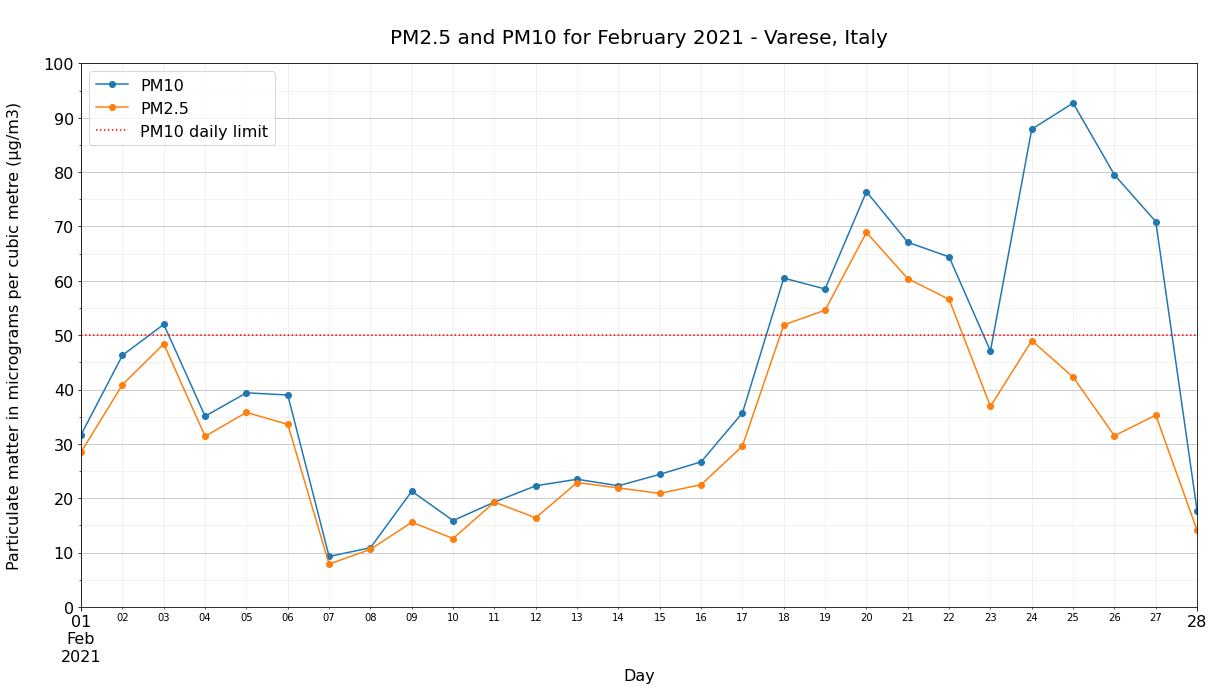

In [18]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Select pandas dataframe columns and define a line plot for PM10 and PM2.5 each
pm10_Feb2021.filter(['PM10']).plot(ax=ax, style='o-', label='PM10')
pm2pt5_Feb2021.filter(['PM2.5']).plot(ax=ax, style='o-',label='PM2.5')
plt.axhline(y=50, color='r', linestyle='dotted', label='PM10 daily limit')

# Set title and axes lable information
plt.title('\nPM2.5 and PM10 for February 2021 - Varese, Italy', fontsize=20, pad=20)
plt.ylabel('Particulate matter in micrograms per cubic metre (µg/m3)\n', fontsize=16)

plt.xlabel('Day', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set major ticks on the y-axis every 10, minor ticks every 5
major_ticks = np.arange(0, 101, 10)
minor_ticks = np.arange(0, 101, 5)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# Use different settings for the grids
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=16,loc=0)
plt.show()

The plot shows you that the PM10 guidelines of 50µg/m3 set by the EU were exceeded multiple time in February 2021.

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.